# Part-1: Data Exploration and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1) Load the given dataset

In [2]:
df=pd.read_csv("Python_Linear_Regres.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2) Fill Null value of children column with the value 0

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

3) Replace the Null values of the column bmi with mean value

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

4) Display a scatter plot between age and children

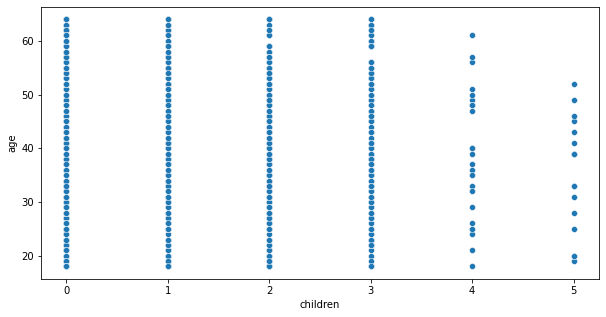

In [6]:
plt.figure(figsize=(10,5))
sns.scatterplot(y="age",x="children",data=df);

5) Display bar plot between bmi and children

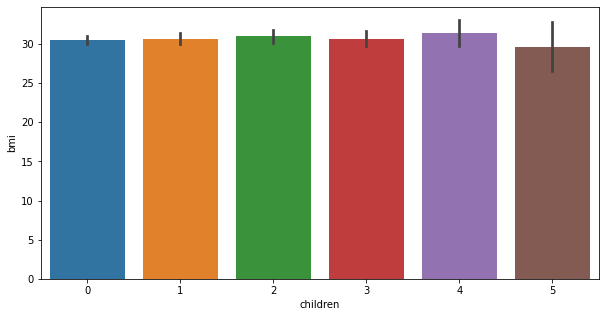

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(y="bmi",x="children",data=df);

6) Perform encoding to convert character data into numerical data

In [8]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [9]:
df=pd.get_dummies(df)

In [10]:
df.head(2)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.5523,0,1,1,0,0,0,1,0


7) Perform scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
mms=MinMaxScaler()

In [13]:
df_mms=pd.DataFrame(mms.fit_transform(df),columns=df.columns)

In [14]:
df_mms.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


# Part-2: Working with Models

1) Separate feature data from target data

In [15]:
X=df_mms.drop("charges",axis=1)
y=df_mms["charges"]

In [16]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [17]:
y.head()

0    0.251611
1    0.009636
2    0.053115
3    0.333010
4    0.043816
Name: charges, dtype: float64

2) Create a Linear regression model between Features and target data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [20]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
559,0.021739,0.526500,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
273,0.695652,0.309255,0.2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
471,0.000000,0.380818,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
22,0.000000,0.488028,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
939,0.760870,0.363734,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
y_train.head()

559    0.008373
273    0.135610
471    0.017265
22     0.000242
939    0.133535
Name: charges, dtype: float64

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_predict=model.predict(X_test)

In [26]:
y_predict

array([ 0.11165358,  0.07667652,  0.227334  ,  0.15883835,  0.04285804,
        0.13589508,  0.12751203,  0.39263948,  0.09955417,  0.47261134,
        0.0101498 ,  0.04901906,  0.09986283,  0.16180463,  0.18898598,
        0.16004603,  0.06857529,  0.27646474,  0.1545054 ,  0.4758472 ,
        0.52772756,  0.05282204,  0.00195681,  0.09884049,  0.04752468,
        0.19712467,  0.17386236,  0.1467503 ,  0.08700857,  0.47995644,
       -0.04454355,  0.52807492,  0.13036403,  0.09940064,  0.10898051,
        0.17136562,  0.19799786,  0.18740753,  0.14041874,  0.11920083,
        0.23345058,  0.13939507,  0.07078772,  0.16695439,  0.06713393,
        0.09499379,  0.08656166,  0.52943079,  0.15865457,  0.15257525,
        0.50902853,  0.06737302,  0.15017354,  0.21606727,  0.15696711,
        0.19135014,  0.176649  ,  0.1059581 ,  0.10598938,  0.53750385,
       -0.006922  ,  0.5148425 ,  0.57414094,  0.00312209,  0.42822372,
        0.14218111,  0.07701981,  0.13155284,  0.11515305,  0.10

In [27]:
y_test

7       0.098320
999     0.066178
1209    0.179179
491     0.373372
625     0.041734
          ...   
271     0.666176
695     0.033191
1039    0.341138
323     0.166715
835     0.096386
Name: charges, Length: 268, dtype: float64

3) Display the test score and training score

In [28]:
from sklearn.metrics import r2_score

In [29]:
model.score(X_train, y_train)

0.7636624681782705

In [30]:
model.score(X_test, y_test)

0.6953286838318304

4) Extract slope and intercept value from the model

In [31]:
model.coef_

array([ 0.19057389,  0.20946072,  0.04336008,  0.00203036, -0.00203036,
       -0.19253524,  0.19253524,  0.00680952,  0.00374476, -0.00749462,
       -0.00305966])

In [32]:
model.intercept_

0.12729959313683298

5) Display Mean Squared Error

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mse=mean_squared_error(y_test,y_predict)

In [35]:
mse

0.010887157229690324

6) Display Mean Absolute Error

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
mae=mean_absolute_error(y_test,y_predict)

In [38]:
mae

0.07270875836201114

7) Display Root mean Squared error

In [39]:
rmse=np.sqrt(mse)

In [40]:
rmse

0.1043415412464773

8) Display R2 score

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2 = r2_score(y_test,y_predict)

In [44]:
r2

0.6953286838318304